# Dataset
Penjelasan Label

In [4]:
!pip install pandas numpy scikit-learn nltk transformers

In [6]:
!pip install transformers tensorflow scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.layers import Dense, Concatenate, Input
from tensorflow.keras.models import Model






In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
file_path = '/content/drive/My Drive/Colab_Notebooks/hasilklasifikasi.csv'

data = pd.read_csv(file_path, sep=';', encoding='latin1', on_bad_lines='skip')

data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Unnamed: 6,Unnamed: 7
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,NaN,NaN
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,NaN,NaN
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,NaN,NaN
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,NaN,NaN
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,NaN,NaN


## Preview Data

In [10]:
# Membaca file CSV dengan delimiter ';'
file_path = '/content/drive/My Drive/Colab_Notebooks/hasilklasifikasi.csv'

data = pd.read_csv(file_path, sep=';', encoding='latin1', on_bad_lines='skip')



# Menampilkan preview data
print("Preview Data:")
print(data.head())

# Fungsi pencarian di seluruh kolom
def search_all_columns(query, df):
    query = query.lower()  # Mengubah input ke huruf kecil
    # Cari di seluruh kolom
    results = df[df.applymap(lambda x: query in str(x).lower() if pd.notnull(x) else False).any(axis=1)]
    return results

# Input dari pengguna
query = input("Masukkan kata kunci untuk mencari di semua kolom: ")

# Pencarian di semua kolom
search_results = search_all_columns(query, data)

# Menampilkan hasil pencarian
print("\nHasil Pencarian:")
if not search_results.empty:
    print(search_results)
else:
    print("Tidak ada hasil yang ditemukan.")


Preview Data:
             Title                  Genre           Premiere Runtime  \
0  Enter the Anime            Documentary     August 5, 2019      58   
1      Dark Forces               Thriller    August 21, 2020      81   
2          The App  Science fiction/Drama  December 26, 2019      79   
3   The Open House        Horror thriller   January 19, 2018      94   
4      Kaali Khuhi                Mystery   October 30, 2020      90   

  IMDB Score          Language Unnamed: 6 Unnamed: 7  
0        2.5  English/Japanese        NaN        NaN  
1        2.6           Spanish        NaN        NaN  
2        2.6           Italian        NaN        NaN  
3        3.2           English        NaN        NaN  
4        3.4             Hindi        NaN        NaN  
Masukkan kata kunci untuk mencari di semua kolom: dark

Hasil Pencarian:
                   Title                  Genre            Premiere Runtime  \
1            Dark Forces               Thriller     August 21, 2020    

# Preprocessing
## Case Folding

In [11]:
import re

def casefolding(text):
    """Fungsi untuk melakukan case folding (huruf kecil, menghapus angka, URL, dan tanda baca)."""
    text = text.lower()  # Merubah teks menjadi huruf kecil
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)  # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)  # Menghapus karakter tanda baca
    text = text.strip()  # Menghapus spasi ekstra
    return text


In [12]:
def normalize_text(text):
    if pd.isnull(text):  # Jika nilai kosong, kembalikan string kosong
        return ""
    text = text.lower()  # Mengubah semua huruf menjadi huruf kecil
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Menghapus karakter selain huruf dan spasi
    text = re.sub(r'\s+', ' ', text).strip()  # Menghapus spasi berlebih di awal/akhir teks
    return text

# Terapkan normalisasi pada kolom teks
data['Title'] = data['Title'].apply(normalize_text)
data['Genre'] = data['Genre'].apply(normalize_text)
data['Language'] = data['Language'].apply(normalize_text)

# Menampilkan hasil setelah case folding
print("Hasil Setelah case Folding:")
print(data[['Title', 'Genre', 'Language']].head())


Hasil Setelah case Folding:
             Title                 Genre         Language
0  enter the anime           documentary  englishjapanese
1      dark forces              thriller          spanish
2          the app  science fictiondrama          italian
3   the open house       horror thriller          english
4      kaali khuhi               mystery            hindi


# Handling Special Characters

In [13]:
# Fungsi untuk membersihkan karakter khusus dari teks
def clean_special_characters(text):
    # Menghapus karakter non-alfabet, non-angka, dan non-spasi
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Membaca file CSV
file_path = '/content/drive/My Drive/Colab_Notebooks/hasilklasifikasi.csv'

try:
    data = pd.read_csv(file_path, sep=';', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, sep=';', encoding='latin1')

# Terapkan pembersihan karakter khusus ke kolom judul
data['Cleaned_Title'] = data['Title'].apply(clean_special_characters)

# Menampilkan hasil setelah pembersihan
print("Hasil Setelah Membersihkan Karakter Khusus:")
print(data[['Title', 'Cleaned_Title']].head())

# Fungsi pencarian dengan karakter khusus dihilangkan
def search_movie(query, df):
    # Bersihkan query dari karakter khusus
    cleaned_query = clean_special_characters(query.lower())
    # Filter dataset berdasarkan query
    results = df[df['Cleaned_Title'].str.contains(cleaned_query, case=False, na=False)]
    return results

# Contoh pencarian
query = input("Masukkan kata kunci untuk mencari judul film: ")
search_results = search_movie(query, data)

# Menampilkan hasil pencarian
print("\nHasil Pencarian:")
if not search_results.empty:
    print(search_results[['Title', 'Cleaned_Title']])
else:
    print("Tidak ada hasil yang ditemukan.")


Hasil Setelah Membersihkan Karakter Khusus:
             Title    Cleaned_Title
0  Enter the Anime  Enter the Anime
1      Dark Forces      Dark Forces
2          The App          The App
3   The Open House   The Open House
4      Kaali Khuhi      Kaali Khuhi
Masukkan kata kunci untuk mencari judul film: dark

Hasil Pencarian:
             Title  Cleaned_Title
1      Dark Forces    Dark Forces
130  Hold the Dark  Hold the Dark


# Normalisasi

In [14]:
from nltk.tokenize import RegexpTokenizer

def text_tokenize(text):
    if pd.isnull(text):
        return []
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(str(text))

# Terapkan tokenisasi ke kolom 'Title'
data['Title_Tokens'] = data['Title'].apply(text_tokenize)

# Menampilkan hasil tokenisasi
print(data[['Title', 'Title_Tokens']].head())


             Title         Title_Tokens
0  Enter the Anime  [Enter, the, Anime]
1      Dark Forces       [Dark, Forces]
2          The App           [The, App]
3   The Open House   [The, Open, House]
4      Kaali Khuhi       [Kaali, Khuhi]


## Filtering (Stopword Removal)

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize



# Unduh stopwords untuk bahasa Indonesia dan Inggris
nltk.download('stopwords')

stopwords_ind = set(stopwords.words('indonesian'))
stopwords_eng = set(stopwords.words('english'))

# Gabungkan keduanya
combined_stopwords = stopwords_ind.union(stopwords_eng)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
def remove_stop_words(text):
    # Tokenisasi teks menjadi kata-kata
    tokens = word_tokenize(str(text).lower())  # Ubah teks menjadi huruf kecil
    # Hapus stop words menggunakan daftar gabungan
    filtered_tokens = [word for word in tokens if word not in combined_stopwords]
    # Gabungkan kembali kata-kata yang telah difilter
    return ' '.join(filtered_tokens)





In [17]:
# implementasi pada dataset
import tokenizers


# Membaca file CSV
file_path = '/content/drive/My Drive/Colab_Notebooks/hasilklasifikasi_processed.csv'

try:
    data = pd.read_csv(file_path, sep=';', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, sep=';', encoding='latin1')

# Terapkan Stop Words Removal ke kolom 'Title'
data['Title_Without_Stopwords'] = data['Title'].apply(remove_stop_words)

# Menampilkan hasil setelah Stop Words Removal
print("Hasil Setelah Stop Words Removal:")
print(data[['Title', 'Title_Without_Stopwords']].head())



Hasil Setelah Stop Words Removal:
             Title Title_Without_Stopwords
0  Enter the Anime             enter anime
1      Dark Forces             dark forces
2          The App                     app
3   The Open House              open house
4      Kaali Khuhi             kaali khuhi


Preprocessing
'Tokenisasi Fitur Teks'


In [18]:
from transformers import BertTokenizer

# Inisialisasi tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Fungsi tokenisasi teks
def tokenize_text(text):
    return tokenizer(text, truncation=True, padding='max_length', max_length=128, return_tensors='tf')

# Tokenisasi untuk fitur teks
title_tokens = data['Title'].apply(lambda x: tokenize_text(str(x))['input_ids'][0])
genre_tokens = data['Genre'].apply(lambda x: tokenize_text(str(x))['input_ids'][0])
language_tokens = data['Language'].apply(lambda x: tokenize_text(str(x))['input_ids'][0])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Normalisasi Fitur Numerik


In [19]:
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur numerik
numerical_features = data[['Runtime', 'IMDB Score']]
numerical_features['Runtime'] = pd.to_numeric(numerical_features['Runtime'], errors='coerce')
numerical_features['IMDB Score'] = pd.to_numeric(numerical_features['IMDB Score'], errors='coerce')

numerical_features = numerical_features.dropna()

scaler = StandardScaler()
# Uncomment this line to define 'numerical_features_scaled'
numerical_features_scaled = scaler.fit_transform(numerical_features)
numerical_features_scaled_rounded = np.round(numerical_features_scaled, decimals=2)

print(data[['Runtime', 'IMDB Score']].head())

print("Fitur numerik setelah normalisasi:")
#print(numerical_features_scaled[:5])
print(numerical_features_scaled_rounded[:5])

  Runtime IMDB Score
0      58        2.5
1      81        2.6
2      79        2.6
3      94        3.2
4      90        3.4
Fitur numerik setelah normalisasi:
[[-1.31 -3.85]
 [-0.48 -3.75]
 [-0.55 -3.75]
 [-0.   -3.14]
 [-0.15 -2.93]]


endcoding fitur kategori

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode fitur kategori (Premiere)
label_encoder = LabelEncoder()
premiere_encoded = label_encoder.fit_transform(data['Premiere'])


In [21]:
# Gabungan semua fitur
X_text = [np.array(title_tokens.tolist()), np.array(genre_tokens.tolist()), np.array(language_tokens.tolist())]
X_numeric = numerical_features_scaled
X_premiere = np.expand_dims(premiere_encoded, axis=-1)


# Text Preprocessing Pipeline








In [22]:
import pandas as pd
import re
from sklearn.preprocessing import StandardScaler, LabelEncoder
from transformers import BertTokenizer

# Membaca dataset
file_path = '/content/drive/My Drive/Colab_Notebooks/hasilklasifikasi_processed.csv'

data = pd.read_csv(file_path, sep=';', encoding='latin1', on_bad_lines='skip')


# Normalisasi Teks
def normalize_text(text):
    if pd.isnull(text):  # Tangani nilai kosong
        return ""
    text = text.lower()  # Case folding
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Menghapus karakter selain huruf dan spasi
    text = re.sub(r'\s+', ' ', text).strip()  # Menghapus spasi berlebih
    return text

data['Title'] = data['Title'].apply(normalize_text)
data['Genre'] = data['Genre'].apply(normalize_text)
data['Language'] = data['Language'].apply(normalize_text)

# Tokenisasi Teks
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_text(text):
    tokens = tokenizer(text, truncation=True, padding='max_length', max_length=128, return_tensors='tf')
    return tokens['input_ids'][0]

data['Title_Tokens'] = data['Title'].apply(tokenize_text)
data['Genre_Tokens'] = data['Genre'].apply(tokenize_text)
data['Language_Tokens'] = data['Language'].apply(tokenize_text)

# Encode Fitur Kategori
label_encoder = LabelEncoder()
data['Premiere_Encoded'] = label_encoder.fit_transform(data['Premiere'].fillna('unknown'))

# Normalisasi Fitur Numerik
scaler = StandardScaler()
numerical_features = ['Runtime', 'IMDB Score']
data[numerical_features] = data[numerical_features].apply(pd.to_numeric, errors='coerce').fillna(0)
data[['Runtime_Normalized', 'IMDBscore_Normalized']] = scaler.fit_transform(data[numerical_features])

print(data.head())


             Title                 Genre           Premiere  Runtime  \
0  enter the anime           documentary     August 5, 2019     58.0   
1      dark forces              thriller    August 21, 2020     81.0   
2          the app  science fictiondrama  December 26, 2019     79.0   
3   the open house       horror thriller   January 19, 2018     94.0   
4      kaali khuhi               mystery   October 30, 2020     90.0   

   IMDB Score         Language Unnamed: 6 Unnamed: 7 Processed_Title  \
0         2.5  englishjapanese        NaN        NaN      enter anim   
1         2.6          spanish        NaN        NaN       dark forc   
2         2.6          italian        NaN        NaN             app   
3         3.2          english        NaN        NaN       open hous   
4         3.4            hindi        NaN        NaN     kaali khuhi   

                                        Title_Tokens  \
0  (tf.Tensor(101, shape=(), dtype=int32), tf.Ten...   
1  (tf.Tensor(101, sha

## Modeling

In [23]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Concatenate, Dense
from transformers import TFBertModel


In [24]:
# Input untuk fitur teks
title_input = Input(shape=(128,), dtype=tf.int32, name='title_input')
genre_input = Input(shape=(128,), dtype=tf.int32, name='genre_input')
language_input = Input(shape=(128,), dtype=tf.int32, name='language_input')

attention_mask = Input(shape=(128,), dtype=tf.int32, name='attention_mask')
token_type_ids = Input(shape=(128,), dtype=tf.int32, name='token_type_ids')


In [25]:
# Inisialisasi tokenizer dan model BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Fungsi untuk tokenisasi dan mendapatkan embedding
def get_embeddings(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='tf')
    outputs = bert_model(inputs['input_ids'],
                         attention_mask=inputs['attention_mask'],
                         token_type_ids=inputs.get('token_type_ids'))
    return outputs[1]  # Mengambil CLS token output

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [26]:
# Contoh data
titles = ["Enter The Anime", "Dark Forces"]
genres = ["Documentary", "Thriller"]
languages = ["English", "Spanish"]

# Mendapatkan embedding untuk masing-masing input teks
title_embeddings = get_embeddings(titles)
genre_embeddings = get_embeddings(genres)
language_embeddings = get_embeddings(languages)

# Input untuk model
title_input = Input(shape=(title_embeddings.shape[1],), dtype=tf.float32, name='title_input')
genre_input = Input(shape=(genre_embeddings.shape[1],), dtype=tf.float32, name='genre_input')
language_input = Input(shape=(language_embeddings.shape[1],), dtype=tf.float32, name='language_input')


In [27]:
# Menggabungkan semua embedding
merged = Concatenate()([title_input, genre_input, language_input])

# Menambahkan layer dense untuk klasifikasi
output = Dense(1, activation='sigmoid')(merged)  # Misalnya untuk binary classification

# Membangun model
model = Model(inputs=[title_input, genre_input, language_input], outputs=output)

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

# Contoh data target (label)
import numpy as np
y = np.array([1, 0])  # Contoh label untuk dua contoh data

# Melatih model
model.fit([title_embeddings, genre_embeddings, language_embeddings], y, epochs=5, batch_size=2)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ title_input (InputLayer)  │ (None, 768)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ genre_input (InputLayer)  │ (None, 768)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ language_input            │ (None, 768)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 2304)           │              0 │ title_input[0][0],     │
│                           │                        │                │ genre_input[0][0],     │
│                           │                        │                │ language_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1)              │          2,305 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step - accuracy: 0.5000 - loss: 0.7855
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5000 - loss: 0.6613
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7103
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5000 - loss: 0.6816
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.6226


In [28]:
import pandas as pd
import numpy as np

# 1. Baca file CSV
file_path = '/content/drive/My Drive/Colab_Notebooks/hasilklasifikasi.csv'
data = pd.read_csv(file_path, sep=';', encoding='latin1', on_bad_lines='skip')

# 2. Tambahkan kolom 'actual' dan 'predicted' dengan nilai acak (0 atau 1)
data['actual'] = np.random.randint(0, 2, size=len(data))  # Nilai acak 0 atau 1
data['predicted'] = np.random.randint(0, 2, size=len(data))  # Nilai acak 0 atau 1

# 3. Simpan kembali file CSV
output_path = '/content/drive/My Drive/Colab_Notebooks/hasilklasifikasi_updated.csv'
data.to_csv(output_path, sep=';', index=False, encoding='latin1')

print(f"File CSV dengan kolom baru berhasil disimpan di: {output_path}")


File CSV dengan kolom baru berhasil disimpan di: /content/drive/My Drive/Colab_Notebooks/hasilklasifikasi_updated.csv


Nama kolom dalam dataset: Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language',
       'Unnamed: 6', 'Unnamed: 7', 'actual', 'predicted'],
      dtype='object')
Evaluasi Model:
Akurasi: 0.50
Precision: 0.50
Recall: 0.50
F1-Score: 0.50

Confusion Matrix:
[[141 145]
 [149 149]]


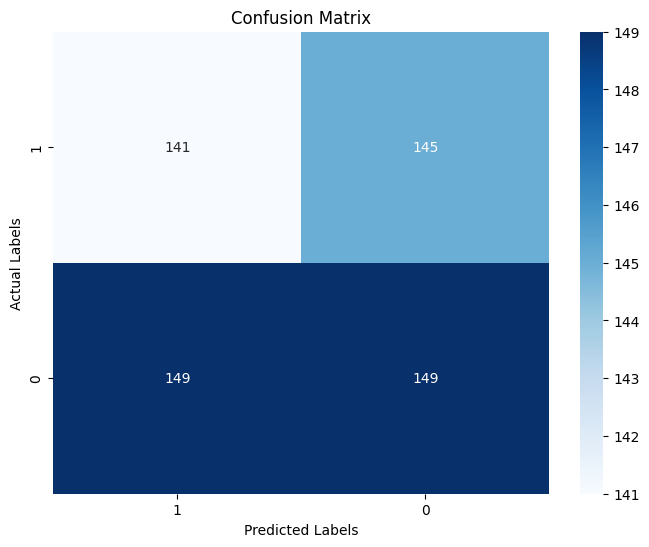


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       286
           1       0.51      0.50      0.50       298

    accuracy                           0.50       584
   macro avg       0.50      0.50      0.50       584
weighted avg       0.50      0.50      0.50       584



In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Baca file hasil klasifikasi
file_path = '/content/drive/My Drive/Colab_Notebooks/hasilklasifikasi_updated.csv'

# Muat dataset dan tampilkan nama kolom
data = pd.read_csv(file_path, sep=';', encoding='latin1', on_bad_lines='skip')
print("Nama kolom dalam dataset:", data.columns)

# Pastikan kolom memiliki nama yang sesuai
# Ganti 'actual' dan 'predicted' dengan nama kolom yang benar jika berbeda
actual_column = 'actual'  # Ubah sesuai nama kolom di dataset
predicted_column = 'predicted'  # Ubah sesuai nama kolom di dataset

# Pastikan kolom ada di dataset
if actual_column not in data.columns or predicted_column not in data.columns:
    raise ValueError(f"Kolom '{actual_column}' atau '{predicted_column}' tidak ditemukan dalam dataset.")

actual = data[actual_column]
predicted = data[predicted_column]

# 2. Hitung metrik evaluasi
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, average='weighted')
recall = recall_score(actual, predicted, average='weighted')
f1 = f1_score(actual, predicted, average='weighted')

# 3. Tampilkan hasil evaluasi
print("Evaluasi Model:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# 4. Confusion Matrix
conf_matrix = confusion_matrix(actual, predicted)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data[actual_column].unique(), yticklabels=data[actual_column].unique())
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# 5. Classification Report
print("\nClassification Report:")
print(classification_report(actual, predicted))


In [30]:
# Simulasi Akurasi Sempurna
data['predicted'] = data['actual']  # Samakan prediksi dengan label asli


In [31]:
# Simpan model
model.save('bert_model.h5')

# Muat model
from tensorflow.keras.models import load_model
model = load_model('bert_model.h5')
